In [1]:
import alpaca_trade_api as tradeapi
import requests
from dotenv import load_dotenv
import pandas as pd
import os
import numpy as np
from pathlib import Path
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
load_dotenv(verbose=True)

True

In [3]:
#alpaca_api_key = os.getenv("ALPACA_API_KEY")
#alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

alpaca_api_key = "PK2QATFJUTTJTLNCCC9E"
alpaca_secret_key = "OpvkG0g84P35EjDZlJZf0fMdJ4ksJiY6YwxNrN4d"
print(alpaca_api_key)

PK2QATFJUTTJTLNCCC9E


In [4]:
def calculate_sharpe_ratio(df):
    
    df_pct_change = df.pct_change()
    #daily_return
    sharpe_ratio = df_pct_change['close'].mean() / df_pct_change['close'].std()
    
    #annualized sharpe ratio
    return (252 ** 0.5) * sharpe_ratio

In [5]:
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

# Format current date as ISO format
start_date = pd.Timestamp("2011-05-01", tz="America/New_York").isoformat()
today = pd.Timestamp("2021-01-19", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["SPY", "QQQ", "VTI",
           "SPBO", "JNK", "LQD",
           "IYR", "VNQ", "USRT",
           "PSP", "USO", "GLD",
           "MUB", "MUNI", "PZA",
           "VMBS", "MBB", "MBG",
           "TLT", "SCHO", "SHY"
           ]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get closing prices
df_ETFs = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = today
).df

#df_ETFs.to_csv("Resources/Data_ETFs_total.csv", encoding='utf-8', index=True) 

In [6]:
sharpe_ratio_list = []
# for each of the tickers, we will calculate the sharpe ratio and store it in a list of dictionaries 
for ticker in tickers:
    sharpe_ratio = calculate_sharpe_ratio(df_ETFs[ticker])
    sharpe_ratio_list.append({"ticker": ticker, "sharpe_ratio" : sharpe_ratio})

# create a data frame with from the list
df_sharpe_ratio= pd.DataFrame(sharpe_ratio_list)
df_sharpe_ratio

,ticker,sharpe_ratio
0,SPY,0.689446
1,QQQ,0.758361
2,VTI,0.691611
3,SPBO,0.424475
4,JNK,0.306122
5,LQD,0.335085
6,IYR,0.258411
7,VNQ,0.258461
8,USRT,0.172504
9,PSP,0.162776


In [7]:
df_ETFs.head()

GLD                                       IYR  \
                             open    high     low    close    volume   open   
2011-05-02 00:00:00-04:00  151.46  153.61  150.36  150.410  20951575  62.37   
2011-05-03 00:00:00-04:00  150.45  150.97  148.85  149.891  21497844  62.11   
2011-05-04 00:00:00-04:00  149.86  150.34  146.76  147.760  30446784  61.72   
2011-05-05 00:00:00-04:00  146.81  147.58  142.55  143.430  43631708  60.96   
2011-05-06 00:00:00-04:00  145.25  146.09  144.40  145.330  20234099  61.76   

                                                          ...    VNQ         \
                            high     low  close   volume  ...   open   high   
2011-05-02 00:00:00-04:00  62.61  61.710  62.14  5108111  ...  62.13  62.36   
2011-05-03 00:00:00-04:00  62.42  61.040  61.72  8180301  ...  61.74  62.19   
2011-05-04 00:00:00-04:00  61.77  61.103  61.41  7130556  ...  61.29  61.49   
2011-05-05 00:00:00-04:00  61.79  60.890  61.30  7029691  ...  60.71  61.45   
2011-05-06 00:00:00-04:00  61.90  60.730  60.91  9163829  ...  61.50  61.55   

                                                    VTI                       \
                             low  close   volume   open   high    low  close   
2011-05-02 00:00:00-04:00  61.40  61.90  2324829  71.04  71.11  70.43  70.56   
2011-05-03 00:00:00-04:00  60.69  61.39  1828226  70.43  70.51  69.82  70.17   
2011-05-04 00:00:00-04:00  60.75  61.05  1577434  70.18  70.21  69.35  69.68   
2011-05-05 00:00:00-04:00  60.52  60.97  1846927  69.27  69.79  68.80  69.10   
2011-05-06 00:00:00-04:00  60.29  60.45  2121920  69.79  70.14  69.14  69.39   

                                    
                            volume  
2011-05-02 00:00:00-04:00  1401965  
2011-05-03 00:00:00-04:00  1115460  
2011-05-04 00:00:00-04:00  1703428  
2011-05-05 00:00:00-04:00  1455305  
2011-05-06 00:00:00-04:00  1544416  

[5 rows x 105 columns]

In [20]:
# Set the tickers
tickers = ["QQQ", 
           "LQD",
           "VNQ",
           "USO", 
           "PZA",
           "VMBS",
           "TLT"
           ]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get closing prices
df_ETFs = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = today
).df
df_ETFs1 = df_ETFs.dropna()
#df_ETFs1.to_csv("Resources/Data_ETFs_to_use.csv", encoding='utf-8', index=True) 
df_ETFs1

LQD                                         PZA  \
                             open     high       low   close    volume   open   
2011-05-02 00:00:00-04:00  110.05  110.430  109.9600  110.31   1374460  22.77   
2011-05-03 00:00:00-04:00  110.33  110.400  110.0900  110.25    648982  22.76   
2011-05-04 00:00:00-04:00  110.46  110.590  110.3100  110.40    656364  22.86   
2011-05-05 00:00:00-04:00  110.51  110.880  110.5100  110.79    761126  22.99   
2011-05-06 00:00:00-04:00  110.56  111.030  110.4200  110.77    830286  23.05   
...                           ...      ...       ...     ...       ...    ...   
2021-01-12 00:00:00-05:00  135.11  135.540  134.7367  135.47  13240352  27.03   
2021-01-13 00:00:00-05:00  135.76  136.635  135.7300  136.52  15276377  27.07   
2021-01-14 00:00:00-05:00  136.55  136.630  135.8400  135.96  20916224  27.09   
2021-01-15 00:00:00-05:00  136.24  136.510  136.0400  136.14  11651363  27.10   
2021-01-19 00:00:00-05:00  136.09  136.480  136.0500  136.38  11848319  27.06   

                                                             ...     VMBS  \
                             high      low  close    volume  ...     open   
2011-05-02 00:00:00-04:00  22.810  22.7400  22.75  208419.0  ...  50.7348   
2011-05-03 00:00:00-04:00  22.850  22.7600  22.82   83321.0  ...  50.8100   
2011-05-04 00:00:00-04:00  22.990  22.8115  22.94  140827.0  ...  50.8300   
2011-05-05 00:00:00-04:00  23.050  22.9480  23.03  256741.0  ...  50.9200   
2011-05-06 00:00:00-04:00  23.070  23.0000  23.00  109594.0  ...  51.0100   
...                           ...      ...    ...       ...  ...      ...   
2021-01-12 00:00:00-05:00  27.070  27.0000  27.04  836358.0  ...  53.8400   
2021-01-13 00:00:00-05:00  27.090  27.0200  27.09  450882.0  ...  53.9200   
2021-01-14 00:00:00-05:00  27.110  27.0415  27.05  559931.0  ...  53.9800   
2021-01-15 00:00:00-05:00  27.125  27.0600  27.10  314751.0  ...  54.0752   
2021-01-19 00:00:00-05:00  27.100  27.0390  27.08  775158.0  ...  54.0000   

                                                                  VNQ  \
                              high     low    close     volume   open   
2011-05-02 00:00:00-04:00  50.7900  50.730  50.7700     9903.0  62.13   
2011-05-03 00:00:00-04:00  50.8700  50.738  50.8590     3887.0  61.74   
2011-05-04 00:00:00-04:00  50.9100  50.760  50.8176     3146.0  61.29   
2011-05-05 00:00:00-04:00  51.0200  50.920  50.9880     1731.0  60.71   
2011-05-06 00:00:00-04:00  51.1200  50.988  51.0400    11474.0  61.50   
...                            ...     ...      ...        ...    ...   
2021-01-12 00:00:00-05:00  54.0000  53.830  53.9100  2122541.0  81.86   
2021-01-13 00:00:00-05:00  53.9900  53.920  53.9700  5885304.0  82.22   
2021-01-14 00:00:00-05:00  54.0200  53.970  53.9900  1672910.0  83.44   
2021-01-15 00:00:00-05:00  54.0752  53.990  54.0300  2218101.0  83.46   
2021-01-19 00:00:00-05:00  54.0400  53.980  54.0100  1616045.0  85.14   

                                                           
                              high    low  close   volume  
2011-05-02 00:00:00-04:00  62.3600  61.40  61.90  2324829  
2011-05-03 00:00:00-04:00  62.1900  60.69  61.39  1828226  
2011-05-04 00:00:00-04:00  61.4900  60.75  61.05  1577434  
2011-05-05 00:00:00-04:00  61.4500  60.52  60.97  1846927  
2011-05-06 00:00:00-04:00  61.5500  60.29  60.45  2121920  
...                            ...    ...    ...      ...  
2021-01-12 00:00:00-05:00  82.2300  81.23  82.10  7817888  
2021-01-13 00:00:00-05:00  83.3300  82.21  83.17  8129303  
2021-01-14 00:00:00-05:00  84.2200  83.13  83.65  5180799  
2021-01-15 00:00:00-05:00  84.8727  83.18  84.63  3906582  
2021-01-19 00:00:00-05:00  85.1800  83.99  84.31  5378034  

[2443 rows x 35 columns]

In [22]:
df_ETFs1.set_index(pd.to_datetime(df_ETFs1['index'], infer_datetime_format=True), inplace=True)
df_ETFs1.drop(columns=['index'], inplace=True)
df_ETFs1

LQD                                         PZA  \
                             open     high       low   close    volume   open   
index                                                                           
2011-05-02 00:00:00-04:00  110.05  110.430  109.9600  110.31   1374460  22.77   
2011-05-03 00:00:00-04:00  110.33  110.400  110.0900  110.25    648982  22.76   
2011-05-04 00:00:00-04:00  110.46  110.590  110.3100  110.40    656364  22.86   
2011-05-05 00:00:00-04:00  110.51  110.880  110.5100  110.79    761126  22.99   
2011-05-06 00:00:00-04:00  110.56  111.030  110.4200  110.77    830286  23.05   
...                           ...      ...       ...     ...       ...    ...   
2021-01-12 00:00:00-05:00  135.11  135.540  134.7367  135.47  13240352  27.03   
2021-01-13 00:00:00-05:00  135.76  136.635  135.7300  136.52  15276377  27.07   
2021-01-14 00:00:00-05:00  136.55  136.630  135.8400  135.96  20916224  27.09   
2021-01-15 00:00:00-05:00  136.24  136.510  136.0400  136.14  11651363  27.10   
2021-01-19 00:00:00-05:00  136.09  136.480  136.0500  136.38  11848319  27.06   

                                                             ...     VMBS  \
                             high      low  close    volume  ...     open   
index                                                        ...            
2011-05-02 00:00:00-04:00  22.810  22.7400  22.75  208419.0  ...  50.7348   
2011-05-03 00:00:00-04:00  22.850  22.7600  22.82   83321.0  ...  50.8100   
2011-05-04 00:00:00-04:00  22.990  22.8115  22.94  140827.0  ...  50.8300   
2011-05-05 00:00:00-04:00  23.050  22.9480  23.03  256741.0  ...  50.9200   
2011-05-06 00:00:00-04:00  23.070  23.0000  23.00  109594.0  ...  51.0100   
...                           ...      ...    ...       ...  ...      ...   
2021-01-12 00:00:00-05:00  27.070  27.0000  27.04  836358.0  ...  53.8400   
2021-01-13 00:00:00-05:00  27.090  27.0200  27.09  450882.0  ...  53.9200   
2021-01-14 00:00:00-05:00  27.110  27.0415  27.05  559931.0  ...  53.9800   
2021-01-15 00:00:00-05:00  27.125  27.0600  27.10  314751.0  ...  54.0752   
2021-01-19 00:00:00-05:00  27.100  27.0390  27.08  775158.0  ...  54.0000   

                                                                  VNQ  \
                              high     low    close     volume   open   
index                                                                   
2011-05-02 00:00:00-04:00  50.7900  50.730  50.7700     9903.0  62.13   
2011-05-03 00:00:00-04:00  50.8700  50.738  50.8590     3887.0  61.74   
2011-05-04 00:00:00-04:00  50.9100  50.760  50.8176     3146.0  61.29   
2011-05-05 00:00:00-04:00  51.0200  50.920  50.9880     1731.0  60.71   
2011-05-06 00:00:00-04:00  51.1200  50.988  51.0400    11474.0  61.50   
...                            ...     ...      ...        ...    ...   
2021-01-12 00:00:00-05:00  54.0000  53.830  53.9100  2122541.0  81.86   
2021-01-13 00:00:00-05:00  53.9900  53.920  53.9700  5885304.0  82.22   
2021-01-14 00:00:00-05:00  54.0200  53.970  53.9900  1672910.0  83.44   
2021-01-15 00:00:00-05:00  54.0752  53.990  54.0300  2218101.0  83.46   
2021-01-19 00:00:00-05:00  54.0400  53.980  54.0100  1616045.0  85.14   

                                                           
                              high    low  close   volume  
index                                                      
2011-05-02 00:00:00-04:00  62.3600  61.40  61.90  2324829  
2011-05-03 00:00:00-04:00  62.1900  60.69  61.39  1828226  
2011-05-04 00:00:00-04:00  61.4900  60.75  61.05  1577434  
2011-05-05 00:00:00-04:00  61.4500  60.52  60.97  1846927  
2011-05-06 00:00:00-04:00  61.5500  60.29  60.45  2121920  
...                            ...    ...    ...      ...  
2021-01-12 00:00:00-05:00  82.2300  81.23  82.10  7817888  
2021-01-13 00:00:00-05:00  83.3300  82.21  83.17  8129303  
2021-01-14 00:00:00-05:00  84.2200  83.13  83.65  5180799  
2021-01-15 00:00:00-05:00  84.8727  83.18  84.63  3906582  
2021-01-19 00

In [30]:
short_window = 50
long_window = 200

df_closing = pd.DataFrame()

df_closing["QQQ_close"] = df_ETFs1["QQQ"]["close"]
df_closing["QQQ_return"] = df_ETFs1["QQQ"]["close"].pct_change()
df_closing["QQQ_SMA50"] = df_closing["QQQ_close"].rolling(window=short_window).mean()
df_closing["QQQ_SMA200"] = df_closing["QQQ_close"].rolling(window=long_window).mean()
df_closing["QQQ_Vol"] = df_ETFs1["QQQ"]["volume"]

df_closing["LQD_close"] = df_ETFs1["LQD"]["close"]
df_closing["LQD_return"] = df_ETFs1["LQD"]["close"].pct_change()
df_closing["LQD_SMA50"] = df_closing["LQD_close"].rolling(window=short_window).mean()
df_closing["LQD_SMA200"] = df_closing["LQD_close"].rolling(window=long_window).mean()
df_closing["LQD_Vol"] = df_ETFs1["LQD"]["volume"]

df_closing["VNQ_close"] = df_ETFs1["VNQ"]["close"]
df_closing["VNQ_return"] = df_ETFs1["VNQ"]["close"].pct_change()
df_closing["VNQ_SMA50"] = df_closing["VNQ_close"].rolling(window=short_window).mean()
df_closing["VNQ_SMA200"] = df_closing["VNQ_close"].rolling(window=long_window).mean()
df_closing["VNQ_Vol"] = df_ETFs1["VNQ"]["volume"]


df_closing["USO_close"] = df_ETFs1["USO"]["close"]
df_closing["USO_return"] = df_ETFs1["USO"]["close"].pct_change()
df_closing["USO_SMA50"] = df_closing["USO_close"].rolling(window=short_window).mean()
df_closing["USO_SMA200"] = df_closing["USO_close"].rolling(window=long_window).mean()
df_closing["USO_Vol"] = df_ETFs1["USO"]["volume"]

df_closing["PZA_close"] = df_ETFs1["PZA"]["close"]
df_closing["PZA_return"] = df_ETFs1["PZA"]["close"].pct_change()
df_closing["PZA_SMA50"] = df_closing["PZA_close"].rolling(window=short_window).mean()
df_closing["PZA_SMA200"] = df_closing["PZA_close"].rolling(window=long_window).mean()
df_closing["PZA_Vol"] = df_ETFs1["PZA"]["volume"]

df_closing["VMBS_close"] = df_ETFs1["VMBS"]["close"]
df_closing["VMBS_return"] = df_ETFs1["VMBS"]["close"].pct_change()
df_closing["VMBS_SMA50"] = df_closing["VMBS_close"].rolling(window=short_window).mean()
df_closing["VMBS_SMA200"] = df_closing["VMBS_close"].rolling(window=long_window).mean()
df_closing["VMBS_Vol"] = df_ETFs1["VMBS"]["volume"]

df_closing["TLT_close"] = df_ETFs1["TLT"]["close"]
df_closing["TLT_return"] = df_ETFs1["TLT"]["close"].pct_change()
df_closing["TLT_SMA50"] = df_closing["TLT_close"].rolling(window=short_window).mean()
df_closing["TLT_SMA200"] = df_closing["TLT_close"].rolling(window=long_window).mean()
df_closing["TLT_Vol"] = df_ETFs1["TLT"]["volume"]

#df_closing.index = df_closing.index.date
                                   
# Output the data to CSV
#df_closing.to_csv("Resources/Data_ETFs_model_use.csv", encoding='utf-8', index=True) 

In [31]:
df_closing1 = df_closing.dropna()
df_closing1

,QQQ_close,QQQ_return,QQQ_SMA50,QQQ_SMA200,QQQ_Vol,LQD_close,LQD_return,LQD_SMA50,LQD_SMA200,LQD_Vol,...,VMBS_close,VMBS_return,VMBS_SMA50,VMBS_SMA200,VMBS_Vol,TLT_close,TLT_return,TLT_SMA50,TLT_SMA200,TLT_Vol
index,,,,,,,,,,,,,,,,,,,,,
2012-02-14 00:00:00-05:00,63.21,0.002856,56.5943,55.642217,33059444,116.55,0.001289,114.136202,112.46041,1746454,...,52.060,0.001154,52.021854,51.753993,35210.0,117.75,0.005207,118.760200,109.394110,7417042
2012-02-15 00:00:00-05:00,62.75,-0.007277,56.8009,55.661005,71839964,116.42,-0.001115,114.234652,112.49096,885907,...,52.090,0.000576,52.029464,51.760593,45862.0,117.55,-0.001699,118.737800,109.513710,6690835
2012-02-16 00:00:00-05:00,63.62,0.013865,57.0133,55.685655,63607526,116.27,-0.001288,114.313652,112.52106,1581477,...,52.060,-0.000576,52.033944,51.766598,19284.0,116.61,-0.007997,118.701200,109.626010,8527190
2012-02-17 00:00:00-05:00,63.43,-0.002986,57.1403,55.709805,37422734,116.01,-0.002236,114.399252,112.54911,1631797,...,52.040,-0.000384,52.037004,51.772710,14079.0,116.60,-0.000086,118.687800,109.736060,5991144
2012-02-21 00:00:00-05:00,63.61,0.002838,57.3555,55.736455,34755703,115.84,-0.001465,114.468052,112.57436,1779776,...,52.005,-0.000673,52.035904,51.777795,59420.0,115.29,-0.011235,118.639800,109.835210,6985597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-12 00:00:00-05:00,313.98,-0.001050,300.5668,264.182210,27010140,135.47,0.001849,136.725400,134.17380,13240352,...,53.910,-0.001852,54.076468,54.280339,2122541.0,150.97,-0.000596,157.352234,162.764421,12279489
2021-01-13 00:00:00-05:00,316.00,0.006434,301.4926,264.801660,19895283,136.52,0.007751,136.781200,134.23670,15276377,...,53.970,0.001113,54.073568,54.277389,5885304.0,152.65,0.011128,157.253634,162.696421,10978139
2021-01-14 00:00:00-05:00,314.25,-0.005538,302.3766,265.420610,21959596,135.96,-0.004102,136.821000,134.29775,20916224,...,53.990,0.000371,54.071568,54.274689,1672910.0,151.24,-0.009237,157.107234,162.627621,13452750


In [28]:
# df_closing2 = df_closing1.reset_index()
# x_var_list = ['QQQ_SMA50','QQQ_SMA200','QQQ_Vol','QQQ_return']
# 'QQQ_close'
# qqq_df = df_closing2[x_var_list]
# qqq_df

In [41]:
short_window = 50
long_window = 200

var_list = ['QQQ_return','QQQ_SMA50','QQQ_SMA200','QQQ_Vol','QQQ_close']
x_var_list = ['QQQ_return','QQQ_SMA50','QQQ_SMA200','QQQ_Vol']
df_qqq_closing = df_closing1[var_list]
df_qqq_closing[var_list]
# df_qqq_closing["QQQ_close"] = df_ETFs1["QQQ"]["close"]
# df_qqq_closing["QQQ_return"] = df_ETFs1["QQQ"]["close"].pct_change()
# df_qqq_closing["QQQ_SMA50"] = df_qqq_closing["QQQ_close"].rolling(window=short_window).mean()
# df_qqq_closing["QQQ_SMA200"] = df_qqq_closing["QQQ_close"].rolling(window=long_window).mean()
# df_qqq_closing["QQQ_Vol"] = df_ETFs1["QQQ"]["volume"]
# df_qqq_closing1 = df_qqq_closing.dropna()
# Set x variable list of features
# x_var_list = ['QQQ_return','QQQ_SMA50','QQQ_SMA200','QQQ_Vol']
# 'QQQ_close'
# Filter by x-variable list

#df_qqq_closing['QQQ_return']

,QQQ_return,QQQ_SMA50,QQQ_SMA200,QQQ_Vol,QQQ_close
index,,,,,
2012-02-14 00:00:00-05:00,0.002856,56.5943,55.642217,33059444,63.21
2012-02-15 00:00:00-05:00,-0.007277,56.8009,55.661005,71839964,62.75
2012-02-16 00:00:00-05:00,0.013865,57.0133,55.685655,63607526,63.62
2012-02-17 00:00:00-05:00,-0.002986,57.1403,55.709805,37422734,63.43
2012-02-21 00:00:00-05:00,0.002838,57.3555,55.736455,34755703,63.61
...,...,...,...,...,...
2021-01-12 00:00:00-05:00,-0.001050,300.5668,264.182210,27010140,313.98
2021-01-13 00:00:00-05:00,0.006434,301.4926,264.801660,19895283,316.00
2021-01-14 00:00:00-05:00,-0.005538,302.3766,265.420610,21959596,314.25


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [36]:
# # Construct training start and end dates
# training_start = df_closing1.index.min().strftime(format= '%Y-%m-%d')
# training_end = '2019-09-14'

# # Construct testing start and end dates
# testing_start =  '2019-09-15'
# testing_end = df_closing1.index.max().strftime(format= '%Y-%m-%d')

# # Print training and testing start/end dates
# print(f"Training Start: {training_start}")
# print(f"Training End: {training_end}")
# print(f"Testing Start: {testing_start}")
# print(f"Testing End: {testing_end}")

Training Start: 2012-02-14
Training End: 2019-09-14
Testing Start: 2019-09-15
Testing End: 2021-01-19


In [69]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.datasets import make_classification
# from sklearn import preprocessing
# from sklearn import utils

# # lab_enc = preprocessing.LabelEncoder()
# # y_train_encoded = lab_enc.fit_transform(y_train1)
# # print(y_train_encoded)
# # print(utils.multiclass.type_of_target(y_train1))
# # print(utils.multiclass.type_of_target(y_train1.astype('int')))
# # print(utils.multiclass.type_of_target(y_train_encoded))

[  6   7   7 ... 134 136 137]
multiclass
multiclass
multiclass


In [97]:
short_window = 50
long_window = 200

data = pd.DataFrame()

data["Open"] = df_ETFs1["QQQ"]["open"]
data["High"] = df_ETFs1["QQQ"]["high"]
data["Low"] = df_ETFs1["QQQ"]["low"]
data["Close"] = df_ETFs1["QQQ"]["close"]
data["Volume"] = df_ETFs1["QQQ"]["volume"]
data["percent_change"] = df_ETFs1["QQQ"]["close"].pct_change()
data["QQQ_SMA50"] = data["Close"].rolling(window=short_window).mean()
data["QQQ_SMA200"] = data["Close"].rolling(window=long_window).mean()
data

,Open,High,Low,Close,Volume,percent_change,QQQ_SMA50,QQQ_SMA200
index,,,,,,,,
2011-05-02 00:00:00-04:00,59.19,59.34,58.8200,58.9924,44312089,NaN,NaN,NaN
2011-05-03 00:00:00-04:00,58.95,59.00,58.3300,58.6900,30746589,-0.005126,NaN,NaN
2011-05-04 00:00:00-04:00,58.72,58.87,58.1100,58.6000,48174869,-0.001533,NaN,NaN
2011-05-05 00:00:00-04:00,58.31,58.97,58.0800,58.2800,60501065,-0.005461,NaN,NaN
2011-05-06 00:00:00-04:00,58.86,59.20,58.3100,58.4800,59986642,0.003432,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-01-12 00:00:00-05:00,314.46,315.58,311.2000,313.9800,27010140,-0.001050,300.5668,264.18221
2021-01-13 00:00:00-05:00,314.19,316.86,313.5700,316.0000,19895283,0.006434,301.4926,264.80166
2021-01-14 00:00:00-05:00,316.50,317.53,313.8616,314.2500,21959596,-0.005538,302.3766,265.42061


In [98]:
# Features construction 
data['Open-Close'] = (data.Open - data.Close)/data.Open
data['High-Low'] = (data.High - data.Low)/data.Low
data['std_5'] = data['percent_change'].rolling(5).std()
data['ret_5'] = data['percent_change'].rolling(5).mean()
data.dropna(inplace=True)

# X is the input variable
#X = data[['Open-Close', 'High-Low', 'std_5', 'ret_5', 'Volume', 'QQQ_SMA50', 'QQQ_SMA200']]
X = data[['Open-Close', 'High-Low', 'std_5', 'ret_5']]
# Y is the target or output variable
y = np.where(data['Close'].shift(-1) > data['Close'], 1, -1)


In [99]:
# Total dataset length
dataset_length = data.shape[0]

# Training dataset length
split = int(dataset_length * 0.75)
split

1683

In [100]:
# Splitiing the X and y into train and test datasets
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Print the size of the train and test dataset
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1683, 4) (561, 4)
(1683,) (561,)


In [124]:
y_train

array([-1,  1, -1, ..., -1, -1,  1])

In [101]:
clf = RandomForestClassifier(random_state=5)

In [102]:
# Create the model on train dataset
model = clf.fit(X_train, y_train)

In [103]:
from sklearn.metrics import accuracy_score
print('Correct Prediction (%): ', 
      accuracy_score(y_test, model.predict(X_test), normalize=True)*100.0)

Correct Prediction (%):  52.406417112299465


In [104]:
# Run the code to view the classification report metrics
from sklearn.metrics import classification_report
report = classification_report(y_test, model.predict(X_test))
print(report)

              precision    recall  f1-score   support

          -1       0.39      0.36      0.38       223
           1       0.60      0.63      0.61       338

    accuracy                           0.52       561
   macro avg       0.50      0.50      0.50       561
weighted avg       0.52      0.52      0.52       561



In [122]:
data['strategy_returns'] = data.percent_change.shift(-1) * model.predict(X)


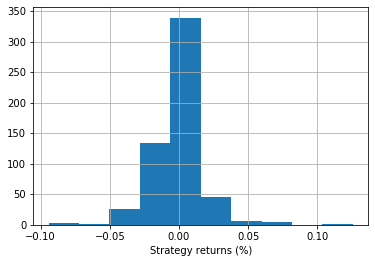

In [107]:
%matplotlib inline
import matplotlib.pyplot as plt
data.strategy_returns[split:].hist()
plt.xlabel('Strategy returns (%)')
plt.show()

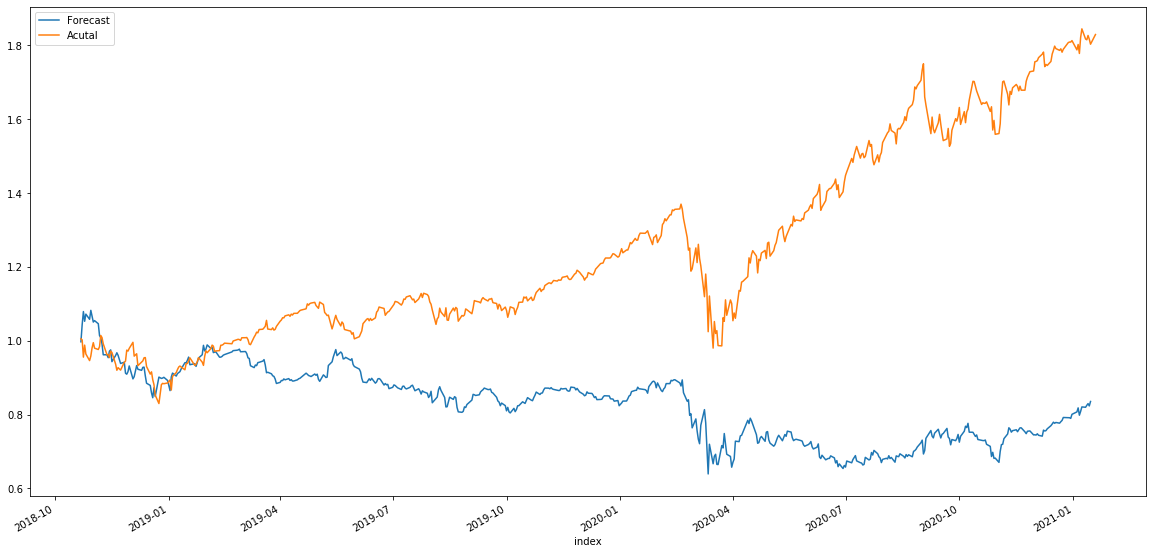

In [121]:
(data.strategy_returns[split:]+1).cumprod().plot(figsize=(20,10))
(data.percent_change[split:]+1).cumprod().plot(figsize=(20,10))
plt.legend(["Forecast","Acutal"])
#plt.ylabel('Strategy returns (%)')
plt.show() 